<a href="https://colab.research.google.com/github/robinhester/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
### import
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [2]:
#getting the data 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-18 21:26:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-02-18 21:26:10 (498 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
#reading in and setting column names
votes = pd.read_csv('house-votes-84.data', names=['party','handicapped_infants','water_project',
                          'budget','physician_fee_freeze', 'el_salvador_aid',
                          'religious_groups','anti_satellite_ban',
                          'aid_to_contras','mx_missile','immigration',
                          'synfuels', 'education', 'right_to_sue','crime','duty_free',
                          'south_africa'])

votes.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
#replacing y with 1, n with 0, and ? with NaN
votes = votes.replace({"y": 1, "n": 0, "?": np.NaN})

In [5]:
#seperating out the republican voting into it's own dataframe
rep = votes[votes['party']=='republican']

rep.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [6]:
#seperating out the democrats voting into it's own data frame
dem = votes[votes['party']=='democrat']

dem.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
#defining a function that finds our confidence interval
def confidence_intervals (array, confidence=0.95):
  mean=np.mean(array)
  n=len(array)
  st_error=np.std(array, ddof=1)/np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * st_error
  return mean - margin_of_error, mean, mean + margin_of_error


In [12]:
confidence_intervals(dem.water_project)

(0.4417180951442038, 0.502092050209205, 0.5624660052742062)

In [0]:
#defining the function that finds our margin of error 
def mean_more(array, confidence=0.95):
  mean = np.mean(array)
  n = len(array)
  st_err = np.std(array, ddof=1) / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * st_err
  return mean, margin_of_error

In [21]:
mean, margin_of_error = mean_more(dem.water_project)
print("mean", mean)
print("margin of error", margin_of_error)

mean 0.502092050209205
margin of error 0.06037395506500122


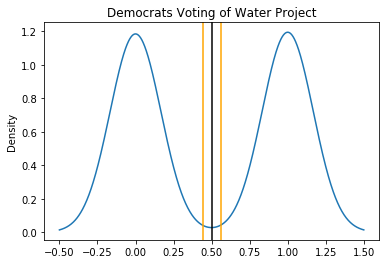

In [14]:
#graphing my confidence interval for the democrat votes on the water project 
con_int = confidence_intervals(dem.water_project)

dem.water_project.plot.density()
plt.title("Democrats Voting of Water Project")
plt.axvline(x=con_int[0], color='orange')
plt.axvline(x=con_int[1], color='black')
plt.axvline(x=con_int[2], color='orange');
plt.show()

Previous code from make features assignment

In [22]:
#getting the lending club stats
!wget https://resources.lendingclub.com/LoanStats_2018Q3.csv.zip

--2020-02-18 21:46:11--  https://resources.lendingclub.com/LoanStats_2018Q3.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q3.csv.zip’

LoanStats_2018Q3.cs     [      <=>           ]  21.90M   962KB/s    in 24s     

2020-02-18 21:46:35 (951 KB/s) - ‘LoanStats_2018Q3.csv.zip’ saved [22964319]



In [25]:
!unzip LoanStats_2018Q3.csv.zip

Archive:  LoanStats_2018Q3.csv.zip
  inflating: LoanStats_2018Q3.csv    


In [26]:
#reading in the lending club stats 
lending_club = pd.read_csv('LoanStats.csv', skiprows=1, skipfooter=2)

lending_club

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000,30000,30000,36 months,18.94%,1098.78,D,D2,NaN,< 1 year,RENT,100000.0,Source Verified,Sep-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,300xx,GA,16.07,0,Mar-2008,1,NaN,114.0,6,1,14574,70.1%,9,w,0.00,0.00,11361.610000,11361.61,...,0.0,1,0,63636,44048,19800,42836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,8400,8400,8400,36 months,17.97%,303.56,D,D1,NaN,NaN,MORTGAGE,30000.0,Source Verified,Sep-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,336xx,FL,3.68,1,Nov-2012,0,15.0,NaN,8,0,1663,19.8%,13,w,0.00,0.00,3018.830000,3018.83,...,25.0,0,0,144882,1663,6800,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000,36 months,6.11%,304.72,A,A1,Public Housing Program Manager,6 years,RENT,50050.0,Not Verified,Sep-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,587xx,ND,4.87,0,Jul-2012,0,NaN,NaN,9,0,9047,14.9%,24,w,0.00,0.00,10599.560165,10599.56,...,0.0,0,0,60900,9047,59000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000,10000,10000,36 months,6.67%,307.27,A,A2,Senior Treasury Analyst,2 years,MORTGAGE,85000.0,Source Verified,Sep-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,18.30,0,Sep-2000,0,30.0,NaN,9,0,17188,56.4%,23,w,0.00,0.00,10377.876159,10377.88,...,0.0,0,0,432306,44254,25500,48806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10000,10000,10000,36 months,7.21%,309.74,A,A3,Sales Operations Manager,1 year,RENT,90000.0,Not Verified,Sep-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,372xx,TN,14.13,0,Feb-2004,0,42.0,NaN,11,0,2048,6.2%,21,w,2997.02,2997.02,7747.810000,7747.81,...,0.0,0,0,86885,40888,29000,53885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128189,NaN,NaN,5000,5000,5000,36 months,16.46%,176.93,C,C5,Labor Worker,3 years,MORTGAGE,57000.0,Not Verified,Jul-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,781xx,TX,33.09,0,Jul-2008,0,25.0,NaN,11,0,7449,41.4%,47,w,2804.85,2804

In [27]:
#def a function that removes the percent sign and converts the int rate over to integer 
string='17.97%'

def remove_percent(string):
    return float(string.strip('%'))

remove_percent(string)

17.97

In [28]:
#applying the function to int rate 
lending_club['int_rate'] = lending_club.int_rate.apply(remove_percent)
lending_club.int_rate

0         18.94
1         17.97
2          6.11
3          6.67
4          7.21
          ...  
128189    16.46
128190     6.19
128191    15.49
128192    11.05
128193    16.46
Name: int_rate, Length: 128194, dtype: float64

In [30]:
#creating our contingency table which is loan amounts and int rate amounts
con_table=pd.crosstab(lending_club.int_rate, lending_club.loan_amnt, margins=True)

con_table

loan_amnt,1000,1025,1075,1100,1125,1150,1200,1225,1250,1300,1325,1350,1375,1400,1425,1450,1475,1500,1525,1550,1600,1650,1675,1700,1750,1775,1800,1825,1850,1875,1900,1925,1950,1975,2000,2050,2075,2100,2150,2175,...,38825,38850,38875,38900,38950,39000,39025,39050,39075,39100,39125,39150,39175,39200,39225,39250,39275,39350,39375,39400,39425,39475,39500,39525,39550,39600,39625,39675,39700,39725,39750,39775,39825,39850,39875,39900,39925,39950,40000,All
int_rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,398
6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,54
6.11,7,0,0,1,0,0,3,0,0,0,0,0,0,1,0,0,0,13,0,1,4,0,0,1,0,0,3,0,0,0,1,0,1,1,28,0,0,4,0,0,...,0,0,0,0,0,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,2,0,0,0,0,1,0,0,0,1,1,0,0,872,9072
6.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,256
6.67,13,0,0,2,0,0,7,1,0,0,0,0,0,1,0,0,0,10,0,0,3,0,0,2,0,0,6,0,0,0,0,0,1,0,29,0,0,6,0,0,...,0,0,1,0,1,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,306,5836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30.84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39
30.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
30.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [42]:
#getting the row and column sums 
row_sums = con_table.iloc[0:61, 1482].values
col_sums = con_table.iloc[61, 0:1482].values

print(row_sums)
print(col_sums)

[ 398   54 9072  256 5836  280 6395  322 7644  266 6902  253  298 6567
 7074  241  336 5479 7888  289 6333  300 6741  258 5884  272 6357  256
 5696  251 5541  158 4104  168 3903  134 3416  109 3024  112 2919   41
  970   40  872   54  915   61  750   66 1185  469  266  194  124  129
  185   39   24    9   15]
[ 693    1    1 ...    3    1 5193]


In [43]:
#getting the observed data 
observed = pd.crosstab(lending_club.int_rate, lending_club.loan_amnt).values
print(observed.shape)
observed

(61, 1482)


array([[  0,   0,   0, ...,   0,   0,  38],
       [  0,   0,   0, ...,   0,   0,   4],
       [  7,   0,   0, ...,   0,   0, 872],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [0]:
#getting the shape 
total_total = lending_club.shape[0]

In [45]:
#getting the expected data 
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(61, 1482)
[[2.15153595e+00 3.10466949e-03 3.10466949e-03 ... 9.31400846e-03
  3.10466949e-03 1.61225486e+01]
 [2.91916938e-01 4.21236563e-04 4.21236563e-04 ... 1.26370969e-03
  4.21236563e-04 2.18748147e+00]
 [4.90420456e+01 7.07677426e-02 7.07677426e-02 ... 2.12303228e-01
  7.07677426e-02 3.67496888e+02]
 ...
 [1.29740862e-01 1.87216250e-04 1.87216250e-04 ... 5.61648751e-04
  1.87216250e-04 9.72213988e-01]
 [4.86528231e-02 7.02060939e-05 7.02060939e-05 ... 2.10618282e-04
  7.02060939e-05 3.64580246e-01]
 [8.10880384e-02 1.17010156e-04 1.17010156e-04 ... 3.51030469e-04
  1.17010156e-04 6.07633743e-01]]


In [46]:
#using chi squared long hang to figure out the chi squared 
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 144586.34281388554


In [37]:
#using scipy to calculate chi squared 
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 144586.34281388554
P-value: 0.0
Degrees of Freedom: 88860
Expected: 
 [[2.15153595e+00 3.10466949e-03 3.10466949e-03 ... 9.31400846e-03
  3.10466949e-03 1.61225486e+01]
 [2.91916938e-01 4.21236563e-04 4.21236563e-04 ... 1.26370969e-03
  4.21236563e-04 2.18748147e+00]
 [4.90420456e+01 7.07677426e-02 7.07677426e-02 ... 2.12303228e-01
  7.07677426e-02 3.67496888e+02]
 ...
 [1.29740862e-01 1.87216250e-04 1.87216250e-04 ... 5.61648751e-04
  1.87216250e-04 9.72213988e-01]
 [4.86528231e-02 7.02060939e-05 7.02060939e-05 ... 2.10618282e-04
  7.02060939e-05 3.64580246e-01]
 [8.10880384e-02 1.17010156e-04 1.17010156e-04 ... 3.51030469e-04
  1.17010156e-04 6.07633743e-01]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)